In [1]:
from __future__ import print_function

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd


# What is `Pandas`?

[`Pandas`](http://pandas.pydata.org/pandas-docs/stable/) provides fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.

`Numpy`/`Scipy`/`astropy.tables` provide ways to store + manipulate data, but sometimes you have to hack things together when using those libraries.  `Pandas` makes those interactions more straightforward.  In my experience, the simplicity of working with `Pandas` helps keep code maintainable and understandable. 

### Where can I see some other examples of Pandas?
- [10 Minutes to Pandas (their tutorial)](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [Jake VanderPlas's blog](https://jakevdp.github.io/blog/2015/10/17/analyzing-pronto-cycleshare-data-with-python-and-pandas/)


# `Numpy` example

In [2]:
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/diamonds.csv"
data = np.genfromtxt(url, delimiter=",", dtype=None, names=True)

data

array([ (b'"1"', 0.23, b'"Ideal"', b'"E"', b'"SI2"', 61.5, 55.0, 326, 3.95, 3.98, 2.43),
       (b'"2"', 0.21, b'"Premium"', b'"E"', b'"SI1"', 59.8, 61.0, 326, 3.89, 3.84, 2.31),
       (b'"3"', 0.23, b'"Good"', b'"E"', b'"VS1"', 56.9, 65.0, 327, 4.05, 4.07, 2.31),
       ...,
       (b'"53938"', 0.7, b'"Very Good"', b'"D"', b'"SI1"', 62.8, 60.0, 2757, 5.66, 5.68, 3.56),
       (b'"53939"', 0.86, b'"Premium"', b'"H"', b'"SI2"', 61.0, 58.0, 2757, 6.15, 6.12, 3.74),
       (b'"53940"', 0.75, b'"Ideal"', b'"D"', b'"SI2"', 62.2, 55.0, 2757, 5.83, 5.87, 3.64)], 
      dtype=[('f0', 'S7'), ('carat', '<f8'), ('cut', 'S11'), ('color', 'S3'), ('clarity', 'S6'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

`data` is now a "structured" `numpy` array.  We can access it like a normal 2d array:

In [3]:
data[0][2]

b'"Ideal"'

but we can also access columns using their names:

In [4]:
data[0]["cut"]

b'"Ideal"'

And we can work with these columns just like a standard `numpy` array

In [5]:
data["price"].mean()

3932.7997219132371

But what happens if we try to add new columns? It'd be nice if it behaved like a `dict`

In [6]:
data["price_per_carat"] = data["price"] / data["carat"]

ValueError: no field of name price_per_carat

Okay. That's not a huge problem. There are alternatives, but [it can be ugly](https://stackoverflow.com/questions/1201817/adding-a-field-to-a-structured-numpy-array).

Let's try separating our data into subsets, and plotting.  It's not bad, but also not great.

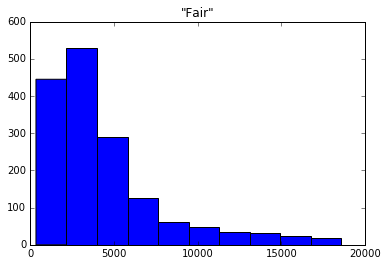

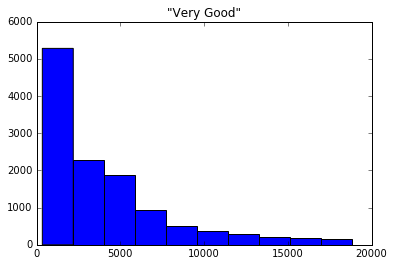

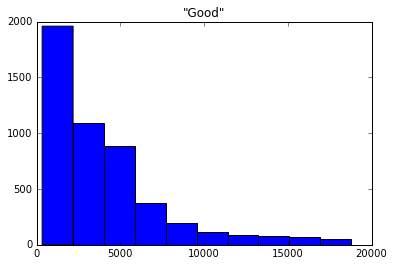

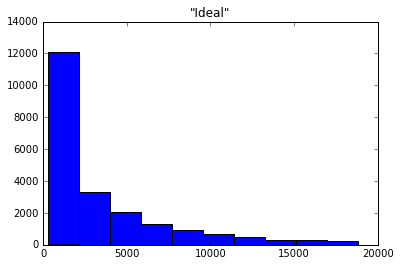

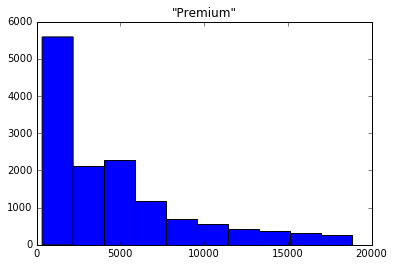

In [7]:
cuts = set(data["cut"])
for cut in cuts:
    plt.figure()
    plt.title(cut.decode())
    plt.hist(data[data["cut"]==cut]["price"])


# `Pandas` version

Let's do some of the same things, except now using a `pandas.DataFrame`.

A `DataFrame` is like an extension of a structured array, but with more features.

In [8]:
url = 'https://github.com/vincentarelbundock/Rdatasets/raw/master/csv/ggplot2/diamonds.csv'
df = pd.read_csv(url, index_col=0)
type(df)

pandas.core.frame.DataFrame

Similar to `astropy` tables, `DataFrames` have nice ways display an overview of the data: 

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can access columns through their names (like with structured arrays) or we can access columns as an object attribute

In [11]:
df["price"].std()

3989.4397381463023

In [12]:
df.price.max()

18823

We can add new columns:

In [13]:
df["price_per_carat"] = df["price"] / df.carat

It also provides nice wrapper functions for visualizing an entire dataset:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109c23ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109d93630>]], dtype=object)

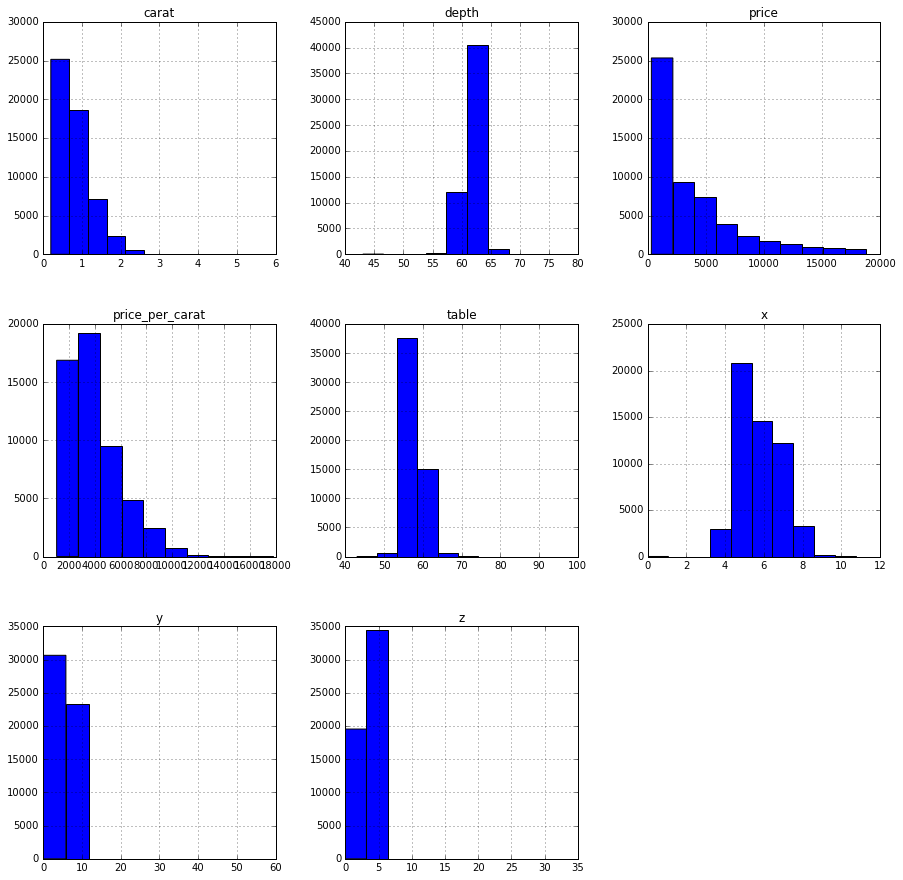

In [14]:
df.hist(figsize=(15,15))

We can create groups based on the values of a column:

In [15]:
df.groupby("cut").price.std()


cut
Fair         3560.386496
Good         3681.589467
Ideal        3808.401108
Premium      4349.204870
Very Good    3935.862040
Name: price, dtype: float64

And we can plot using these groups. It's much less verbose than when we did it in `numpy`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10701d588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b444978>]], dtype=object)

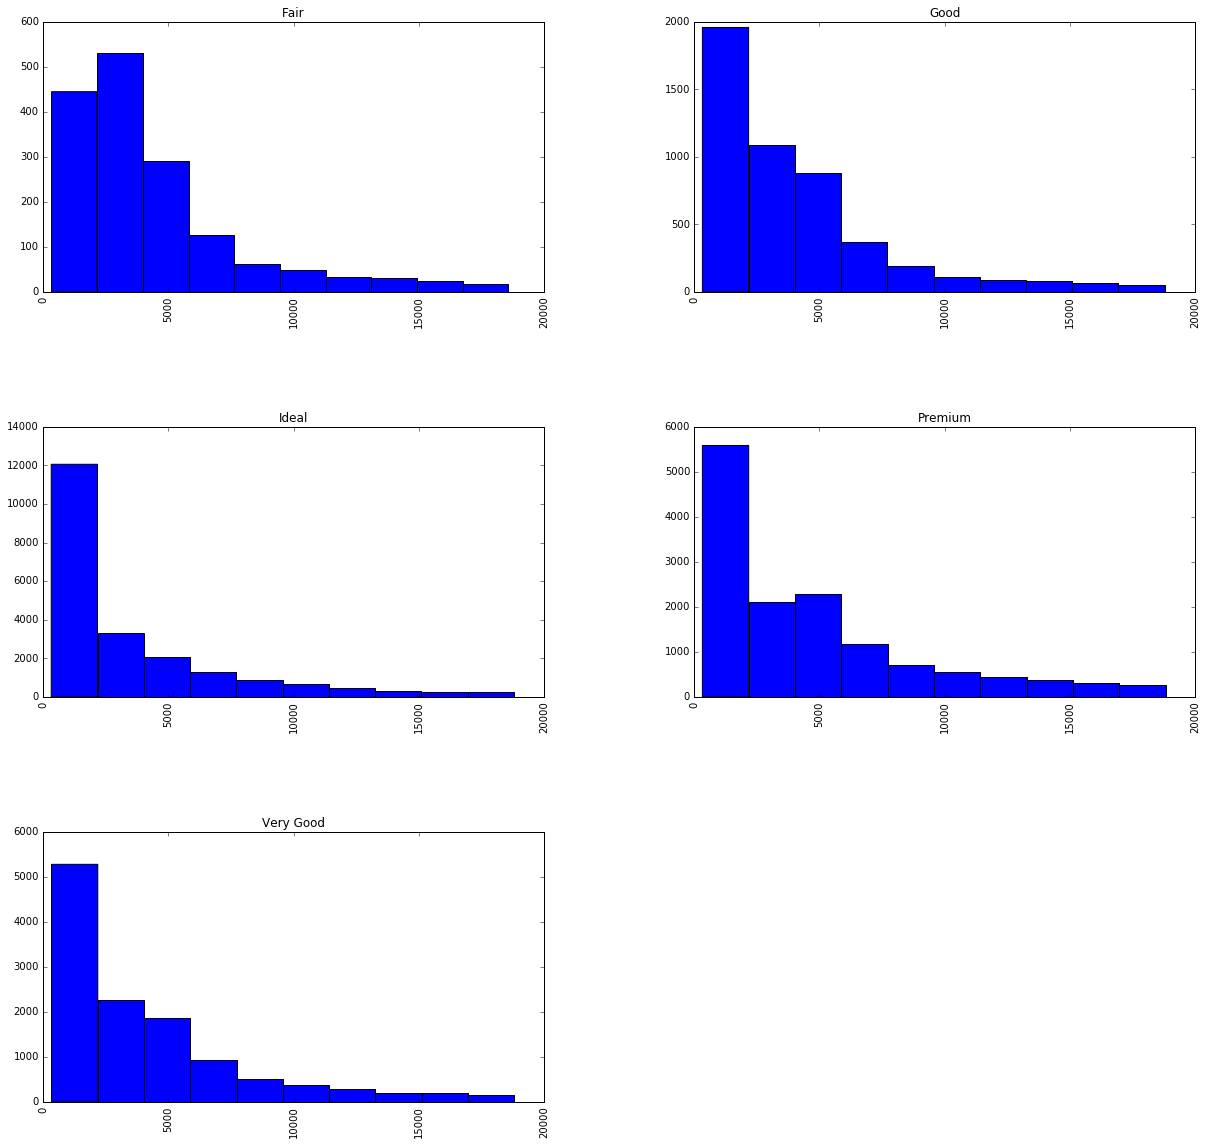

In [16]:
df.hist(column="price", by="cut", figsize=(20,20))

You can also do fancier plots. But sometimes the defaults aren't very pretty (e.g. the plots below are missing x-axis labels, and aren't labeled by cut).

But if you want to see better ways to use pandas with plotting, check out:
http://pandas.pydata.org/pandas-docs/stable/visualization.html

cut
Fair         Axes(0.125,0.125;0.62x0.775)
Good         Axes(0.125,0.125;0.62x0.775)
Ideal        Axes(0.125,0.125;0.62x0.775)
Premium      Axes(0.125,0.125;0.62x0.775)
Very Good    Axes(0.125,0.125;0.62x0.775)
dtype: object

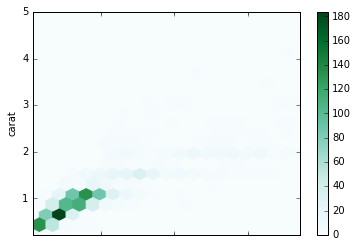

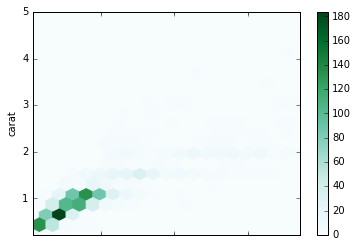

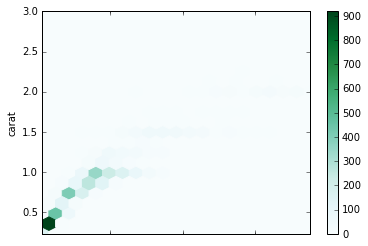

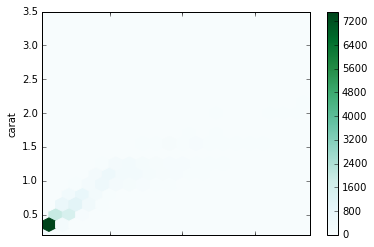

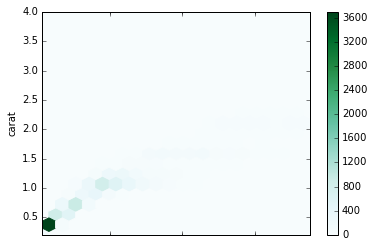

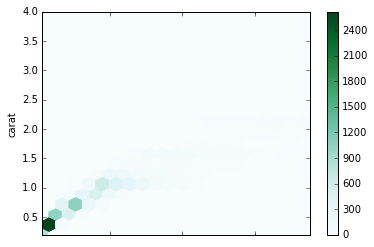

In [17]:
df.groupby("cut").plot.hexbin("price", "carat", gridsize=20, title="")

# `Pandas` with SQL Databases
If you work with databases, you might notice that a `DataFrame` is similar to a table.

This makes it (somewhat) easy to interface with a table in an existing database.  Here I'll read in an existing table directly to a `DataFrame`

In [18]:
df_from_table = pd.read_sql_table("status", "sqlite:///sample_database.db")
df_from_table = df_from_table.set_index("id")
df_from_table.head()


,data_dir,status
id,,
cb33250c-7c9a-490a-be79-903e8bb8e338,../cluster_parameter_study/,Complete
34ad9744-fd58-43f8-ab50-09b499cf7115,../cluster_parameter_study/,Complete
59b7f2b4-ed74-48bc-ab18-7a860043a7de,../cluster_parameter_study/,Complete
6b63464e-5e6d-40c7-be47-d7429bfe0b97,../cluster_parameter_study/,Complete
e153d17b-dfe2-4172-ba68-1c59862b57cc,../cluster_parameter_study/,Complete


In [19]:
df_from_table[df_from_table["status"] == "Running"]

,data_dir,status
id,,
c668b684-b0ac-474f-bdc0-a985c1b695b7,../cluster_parameter_study/,Running
e1d181bc-0095-47d0-98f8-54f3efd95833,../cluster_parameter_study/,Running
58ea2992-5299-4598-b20d-1cdc36c5fb56,../cluster_parameter_study/,Running
b597813d-cc8e-4323-97f1-e6f14c6a9e83,../cluster_parameter_study/,Running
651fc6bd-38c9-4ed5-a2ee-ab0e3553ac1c,../cluster_parameter_study/,Running
6b33e24d-efbe-4849-bf02-3a717e772407,../cluster_parameter_study/,Running
26f97021-7ea1-4db7-bcc2-a7899841ebac,../cluster_parameter_study/,Running
5e06e18c-5721-425d-8df2-ce92ad02520c,../cluster_parameter_study/,Running
5d571036-8dab-4e3f-923d-d058d88f7e96,../cluster_parameter_study/,Running


In [20]:
df_from_table.loc["cb33250c-7c9a-490a-be79-903e8bb8e338"]

data_dir    ../cluster_parameter_study/
status                         Complete
Name: cb33250c-7c9a-490a-be79-903e8bb8e338, dtype: object

# Time Domain

`Pandas` was also developed with time domain applications in mind, so it includes some extra power for dealing with DateTimes.

In [21]:
url = "http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=WVI&data=tmpf&year1=2014&month1=1&day1=1&year2=2014&month2=12&day2=31&tz=America%2FLos_Angeles&format=comma&latlon=no&direct=no"


df = pd.read_csv(url, 
            comment="#", 
            names=["Station", "Time", "Temp"], 
            parse_dates=True,
            header=1, 
            na_values="M",
            index_col="Time")

df.head()

,Station,Temp
Time,,
2014-01-01 01:53:00,WVI,41.00
2014-01-01 02:53:00,WVI,42.08
2014-01-01 03:53:00,WVI,37.94
2014-01-01 04:53:00,WVI,37.94
2014-01-01 05:53:00,WVI,37.94


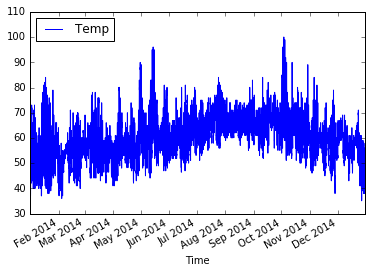

In [22]:
df.plot()

Let's take the average weekly temperature (resample on a weekly timescale):

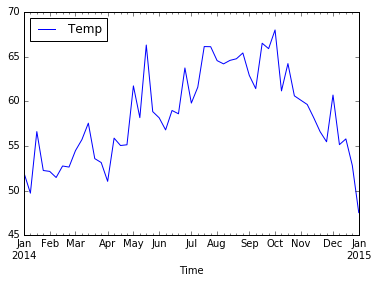

In [23]:
df.resample("w").plot()

That's an ugly plot. It'd be nicer if we just smooth the plot, instead of down-sampling

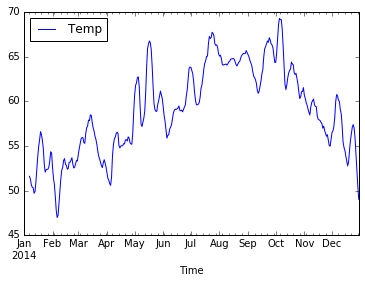

In [24]:
pd.rolling_mean(df, freq="d", window=7).plot()

# Astropy Tables?

I can't provide much comparison to the `astropy` tables, since I don't use them.

# Downsides
- Indexing with `Pandas` can be ugly
    - Because you have an index column, you need to say whether you want the $0^{\mathrm{th}}$ row (`df.iloc[0]`) or the row with an index value of $0$ (`df.loc[0]`)
- Pandas can be slow
    - This probably isn't an issue unless you're writing loops
    - There are ways to speed things up. The easiest is to look into how to [index data correctly](http://pandas.pydata.org/pandas-docs/stable/indexing.html)
    
- [Pandas Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas)


# Want more complex examples?
http://pandas.pydata.org/pandas-docs/stable/cookbook.html